In [2]:
import cv2
from matplotlib import pyplot as plt

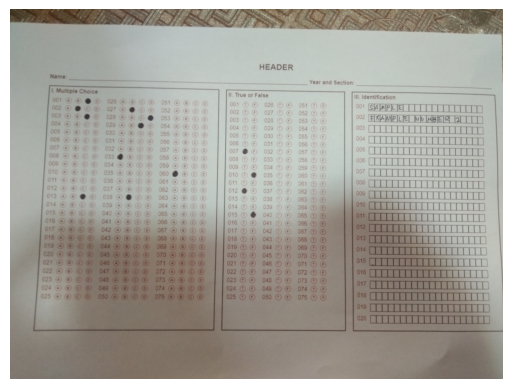

In [3]:
# Load an image from file
image = cv2.imread(r"C:\Users\USER\Downloads\IMG_20240217_113026.jpg")

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [2]:
def show_img(image, **kwargs):
    # Display the image with detected rectangles using matplotlib
    plt.imshow(image,**kwargs)
    plt.axis('off')
    plt.show()

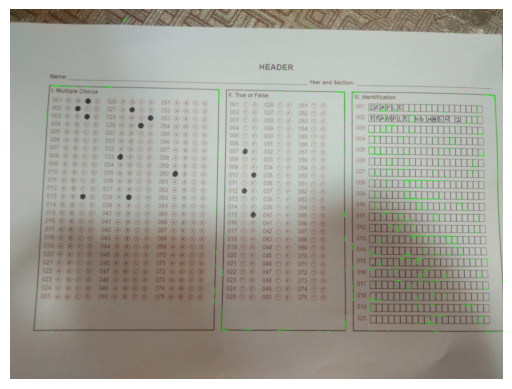

In [5]:

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on their area to find rectangles
rectangles = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) == 4:  # Assuming rectangles have 4 corners
        rectangles.append(approx)

# Draw detected rectangles on the original image
for rect in rectangles:
    cv2.drawContours(image_rgb, [rect], -1, (0, 255, 0), 2)
show_img(image_rgb)

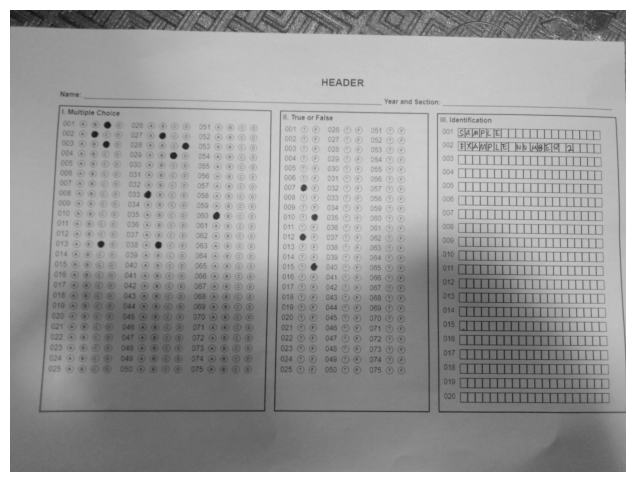

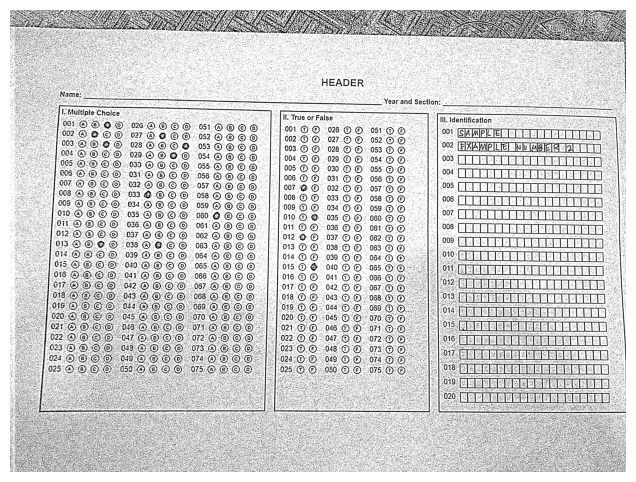

True

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_img(img, cmap=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Load an image from file
image = cv2.imread(r"C:\Users\USER\Downloads\IMG_20240217_113026.jpg", 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
show_img(image, cmap='gray')
show_img(adaptive_thresh, cmap='gray')
ret, thresh = cv2.threshold(adaptive_thresh, 50, 255, 1)

cv2.imwrite("Final Image.jpg", thresh)


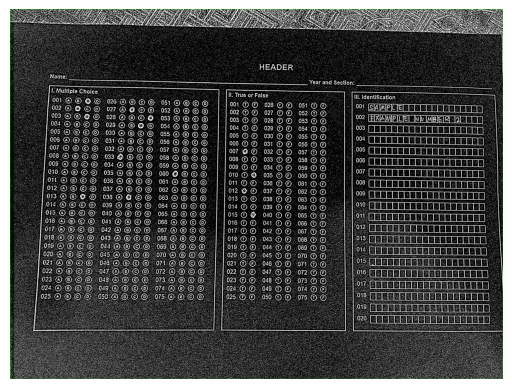

In [5]:
import cv2

# Read the image
image = cv2.imread('Final Image.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold or any other preprocessing as needed
# ...

# Find contours
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours
for contour in contours:
    # Filter contours based on area, aspect ratio, etc.
    x, y, w, h = cv2.boundingRect(contour)
    # Example filtering by area
    if cv2.contourArea(contour) > 500:
        # Draw bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display result
cv2.imshow('Result', image)
show_img(image, cmap='gray')

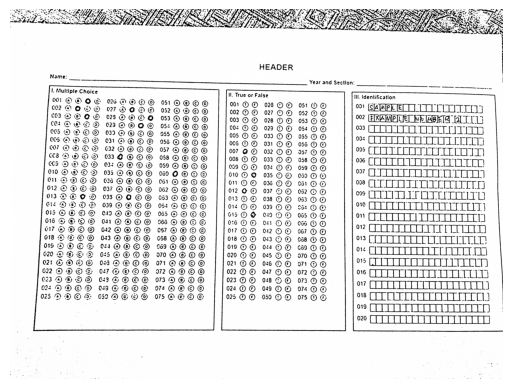

In [8]:
import cv2

# Load the noisy image
image = cv2.imread('Final Image.jpg')

# Apply Median blur
blurred_image = cv2.medianBlur(image, 9)  # Adjust the kernel size (e.g., 5) as needed

# Display the original and blurred images
blurred_image = 255-blurred_image
cv2.imwrite('bl.png', blurred_image)
show_img(blurred_image, cmap='gray')

In [5]:
import cv2

#img = cv2.imread('bl.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours detected:", len(contours))

bounding_rectangles = []

for cnt in contours:
    x1, y1 = cnt[0][0]
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        ratio = float(w) / h
        if ratio >= 0.9 and ratio <= 1.1:
            pass
        else:
            bounding_rectangles.append((x, y, w, h))

# Print all bounding rectangles
for i, rect in enumerate(bounding_rectangles):
    x, y, w, h = rect
    print(f"Bounding Rectangle {i + 1}: (x={x}, y={y}, width={w}, height={h})")

# Draw all bounding rectangles on the image
for rect in bounding_rectangles:
    x, y, w, h = rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('sample.png', img)


Number of contours detected: 4976
Bounding Rectangle 1: (x=4132, y=3118, width=3, height=2)
Bounding Rectangle 2: (x=4049, y=3118, width=4, height=2)
Bounding Rectangle 3: (x=3253, y=3118, width=3, height=2)
Bounding Rectangle 4: (x=952, y=3118, width=4, height=2)
Bounding Rectangle 5: (x=722, y=3118, width=3, height=2)
Bounding Rectangle 6: (x=684, y=3118, width=3, height=2)
Bounding Rectangle 7: (x=472, y=3118, width=4, height=2)
Bounding Rectangle 8: (x=3833, y=3100, width=2, height=4)
Bounding Rectangle 9: (x=170, y=3095, width=4, height=2)
Bounding Rectangle 10: (x=169, y=3091, width=3, height=2)
Bounding Rectangle 11: (x=3971, y=3070, width=3, height=2)
Bounding Rectangle 12: (x=227, y=3051, width=3, height=2)
Bounding Rectangle 13: (x=3881, y=3043, width=4, height=2)
Bounding Rectangle 14: (x=79, y=3040, width=3, height=2)
Bounding Rectangle 15: (x=3852, y=3000, width=2, height=3)
Bounding Rectangle 16: (x=3696, y=2986, width=2, height=3)
Bounding Rectangle 17: (x=3524, y=2983, 

True

In [16]:
print(bounding_rectangles)

[(493, 2285, 2, 3), (1451, 2147, 2, 4), (1451, 2138, 2, 5), (1460, 1929, 2, 8), (1462, 1865, 2, 9), (514, 1863, 2, 3), (1274, 1728, 4, 2), (998, 1727, 2, 5), (521, 1718, 2, 4), (1001, 1656, 2, 4), (524, 1650, 2, 3), (556, 1104, 2, 5), (3417, 912, 5, 4), (2889, 703, 1271, 2013), (1790, 685, 1039, 2025), (1782, 678, 1054, 2040), (3836, 660, 97, 10), (3645, 655, 58, 8), (3534, 652, 97, 9), (206, 649, 1555, 2059), (194, 642, 1573, 2076), (3667, 61, 2, 3), (2587, 0, 2, 3)]


In [30]:
sorted([(rect[2]*rect[3]) for rect in bounding_rectangles])[-3:]

[2150160, 2558523, 3265548]

In [18]:
bounding_rectangles = [(493, 2285, 2, 3), (1451, 2147, 2, 4), (1451, 2138, 2, 5), (1460, 1929, 2, 8), (1462, 1865, 2, 9), (514, 1863, 2, 3), (1274, 1728, 4, 2), (998, 1727, 2, 5), (521, 1718, 2, 4), (1001, 1656, 2, 4), (524, 1650, 2, 3), (556, 1104, 2, 5), (3417, 912, 5, 4), (2889, 703, 1271, 2013), (1790, 685, 1039, 2025), (1782, 678, 1054, 2040), (3836, 660, 97, 10), (3645, 655, 58, 8), (3534, 652, 97, 9), (206, 649, 1555, 2059), (194, 642, 1573, 2076), (3667, 61, 2, 3), (2587, 0, 2, 3)]

# Convert the list of tuples to a list of rectangles
rectangles = [(x, y, x + w, y + h) for x, y, w, h in bounding_rectangles]

# Remove rectangles that are completely contained within another rectangle
reduced_rectangles = []
for rect1 in rectangles:
    is_contained = False
    for rect2 in rectangles:
        if rect1 != rect2:
            if rect1[0] >= rect2[0] and rect1[1] >= rect2[1] and rect1[2] <= rect2[2] and rect1[3] <= rect2[3]:
                is_contained = True
                break
    if not is_contained:
        reduced_rectangles.append(rect1)

# Convert the reduced rectangles back to the format of the original list
bounding_rectangles = [(x, y, w, h) for x, y, x2, y2 in reduced_rectangles for w, h in [(x2 - x, y2 - y)]]

print(bounding_rectangles)


[(2889, 703, 1271, 2013), (1782, 678, 1054, 2040), (3836, 660, 97, 10), (3645, 655, 58, 8), (3534, 652, 97, 9), (194, 642, 1573, 2076), (3667, 61, 2, 3), (2587, 0, 2, 3)]


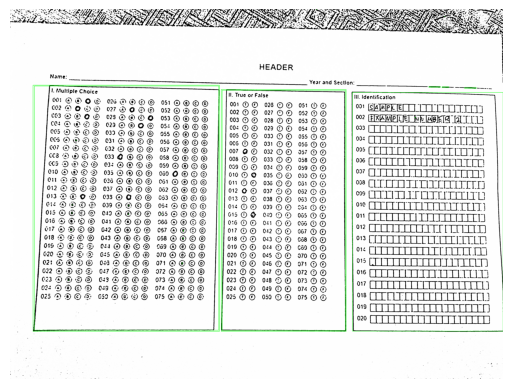

In [20]:
for rect in bounding_rectangles:
    x, y, w, h = rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img(img)

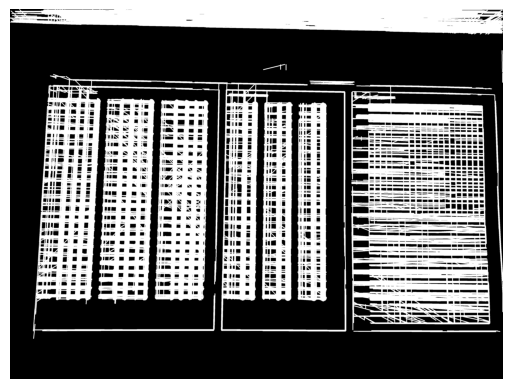

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('houghlines5.jpg')
edge = cv2.Canny(img, 100,200)
lines = cv2.HoughLinesP(edge, rho=1,theta=1*np.pi/180, threshold=100,minLineLength=25,maxLineGap=50)
copy = img*0
for i in lines:
    x1,y1,x2,y2=i[0]
    cv2.line(copy, (x1,y1), (x2,y2), (255,255,255),5)
show_img(copy)
cv2.imwrite('hello.png',copy)

In [31]:
bounding_rectangles

[(2889, 703, 1271, 2013),
 (1782, 678, 1054, 2040),
 (3836, 660, 97, 10),
 (3645, 655, 58, 8),
 (3534, 652, 97, 9),
 (194, 642, 1573, 2076),
 (3667, 61, 2, 3),
 (2587, 0, 2, 3)]

In [33]:
# Calculate areas for each rectangle and rank them by index
ranked_indices = sorted(range(len(bounding_rectangles)), key=lambda x: bounding_rectangles[x][2] * bounding_rectangles[x][3], reverse=True)

print(ranked_indices)

[5, 0, 1, 2, 4, 3, 6, 7]


In [41]:
[x for x in bounding_rectangles]

[(2889, 703, 1271, 2013),
 (1782, 678, 1054, 2040),
 (3836, 660, 97, 10),
 (3645, 655, 58, 8),
 (3534, 652, 97, 9),
 (194, 642, 1573, 2076),
 (3667, 61, 2, 3),
 (2587, 0, 2, 3)]

In [47]:
# Given list
numbers = [3, 5, 1, 2, 9]

# Step 1: Sort the list
sorted_numbers = sorted(numbers)

# Step 2: Create a dictionary of ranks
rank_dict = {number: rank for rank, number in enumerate(sorted_numbers, start=1)}

# Step 3: Retrieve the ranks for each element in the original list
ranks = [rank_dict[number] for number in numbers]

print("Original list:", numbers)
print("Ranks:", ranks)

Original list: [3, 5, 1, 2, 9]
Ranks: [3, 4, 1, 2, 5]


: 

In [35]:
import random

# Generate a list of random numbers
random_numbers = [random.randint(1, 100) for _ in range(10)]

# Sort the indices of the list based on the values in the list
sorted_indices = sorted(range(len(random_numbers)), key=lambda x: random_numbers[x])

print("Original list of random numbers:", random_numbers)
print("Sorted indices of random numbers:", sorted_indices)


Original list of random numbers: [79, 90, 37, 14, 28, 60, 13, 85, 43, 51]
Sorted indices of random numbers: [6, 3, 4, 2, 8, 9, 5, 0, 7, 1]


In [17]:
import cv2

img = cv2.imread('bl.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours detected:", len(contours))

bounding_boxes = []  # List to store bounding boxes

for cnt in contours:
    x1,y1 = cnt[0][0]
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        ratio = float(w)/h
        if ratio >= 0.9 and ratio <= 1.1:
            bounding_boxes.append([x, y, w, h, 'Square'])
            img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
            cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
        else:
            bounding_boxes.append([x, y, w, h, 'Rectangle'])
            cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

# Show the image with contours
cv2.imshow('Contours', img)
cv2.imwrite('Countours.jpg', img)

# Print bounding boxes
for i, box in enumerate(bounding_boxes):
    print(f"Box {i + 1}: {box}")


Number of contours detected: 4839


In [37]:
from boxdetect.pipelines import get_boxes
from boxdetect import config

cfg = config.PipelinesConfig()

rects, grouping_rects, image, output_image = get_boxes(r"C:\Users\USER\Downloads\IMG_20240217_113026.jpg", cfg=cfg, plot=False)

Processing file:  C:\Users\USER\Downloads\IMG_20240217_113026.jpg


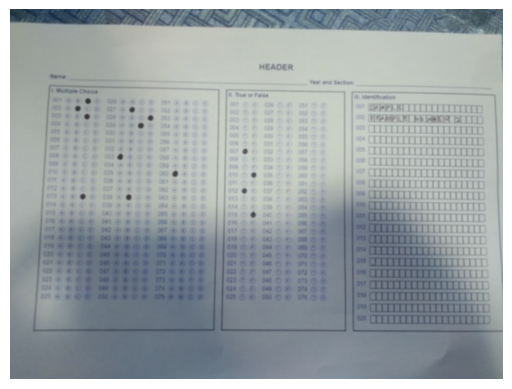

In [34]:
# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
blurred = cv2.GaussianBlur(image, (15,15), 30) 
show_img(blurred, cmap='gray')

In [45]:
def get_answers(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurry = cv2.GaussianBlur(gray, (3, 3), 1)
    thresh = cv2.threshold(blurry, 225, 255,
                       cv2.THRESH_BINARY_INV)[1]

    # find contours in the thresholded image, then initialize
    # the list of contours that correspond to questions
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1]

    questionCnts = []

    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour, then use the
        # bounding box to derive the aspect ratio
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)

        # in order to label the contour as a question, region
        # should be sufficiently wide, sufficiently tall, and
        # have an aspect ratio approximately equal to 1
        if w >= 18 and h >= 18 and 0.9 <= ar and ar <= 1.2:
            questionCnts.append(c)


    cv2.drawContours(image, questionCnts, -1, (255, 0, 0), 1)
    if(questionCnts < 45*4):
        raise Exception("Didn't found all possible answers")

In [48]:
get_answers(image)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'
